In [1]:
import pandas as pd
from os import path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
DATA_DIR = path.join('..', 'data')

In [2]:
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['pgf.rcfonts'] = False

In [3]:
RESULT_HEADER = ['Init_station','Init_time', 'Tick_length','Init_count',
                 'Travel_period','Multiplier','Count_type']
# INDEX = ['Init_station','Init_time','Init_count','Count_type']
results = pd.DataFrame(np.load('travel_periods2.npy'))
timesteps = len(results.columns) - len(RESULT_HEADER)
results.columns = RESULT_HEADER + list(range(timesteps))
# results.drop(columns=['Travel_period', 'Tick_length'], inplace=True)
results.replace({'Count_type': {0.0: 'S', 1.0: 'I', 2.0: 'R', 3.0: 'N'}}, inplace=True)
results.set_index(RESULT_HEADER, inplace=True)

In [4]:
I_cols = results.xs('I', level='Count_type').T
R_cols = results.xs('R', level='Count_type').T

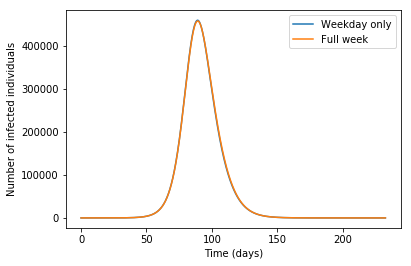

In [5]:
I_by_period = I_cols.T.groupby('Travel_period').mean()
I_by_period.columns = [col / 24 for col in I_by_period.columns]
I_by_period.index = pd.Index(('Weekday only', 'Full week'))
ax = I_by_period.T.plot()
ax.set_xlabel('Time (days)')
ax.set_ylabel('Number of infected individuals')
ax.legend(title='')
plt.savefig('../../diss/periodPlot.pgf')

TypeError: not all arguments converted during string formatting

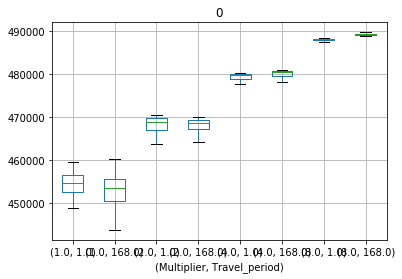

In [15]:
tmp = I_cols.T.reset_index()
tmp.drop(columns=list(tmp.columns[:4]), inplace=True)
tmp.replace({'Travel_period': {24: 1, None: 7}}, inplace=True)
tmp.set_index(['Multiplier', 'Travel_period']).T.max()\
        .reset_index().boxplot(by=('Multiplier', 'Travel_period'), column=0, showfliers=False)